In [17]:
import matplotlib.pyplot as plt
import pandas
import matplotlib

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# import matplotlib.font_manager as font_manager
# prop = font_manager.FontProperties(fname="/home/wenjie/.local/share/fonts/LinLibertine_Rah.ttf")
# print(prop.get_name())

# nice_fonts = {
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif" : prop.get_name(),
# }
# matplotlib.rcParams.update(nice_fonts)

In [18]:
data = pandas.read_csv("mj-results.csv")

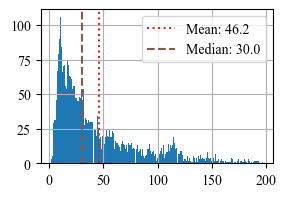

In [19]:
num_input_tokens = data["num_tokens"]
num_input_tokens_sample = num_input_tokens[num_input_tokens <= 200]
plt.figure(figsize=(3, 2))
plt.hist(num_input_tokens_sample, bins=200, histtype='barstacked', facecolor='tab:blue')
mean = num_input_tokens.mean()
median = num_input_tokens.median()
plt.axvline(x=mean, linestyle=":", color="tab:red", label=f"Mean: {mean:.01f}")
plt.axvline(x=median, linestyle="--",color="tab:brown", label=f"Median: {median:.01f}")
plt.legend()
plt.grid()
plt.savefig("num_input_tokens.pdf", bbox_inches="tight")
plt.show()

In [20]:
num_input_tokens = data["num_lines"]
num_input_tokens_sample = num_input_tokens[num_input_tokens <= 40]
plt.figure(figsize=(3, 2))
plt.hist(num_input_tokens_sample, bins=40, histtype='barstacked', facecolor='tab:blue')
mean = num_input_tokens.mean()
median = num_input_tokens.median()
plt.axvline(x=mean, linestyle=":", color="tab:red", label=f"Mean: {mean:.01f}")
plt.axvline(x=median, linestyle="--",color="tab:brown", label=f"Median: {median:.01f}")
plt.legend()
plt.grid()
plt.savefig("num_input_lines.pdf", bbox_inches="tight")
plt.show()


In [21]:
plt.figure(figsize=(4.5, 2.5))
plt.xlim([0, 200])
plt.yscale("log")
markers={5: "1", 4: "x", 3: "2", 2: "+", 1: "3"}
clr = {5: "#0b2a3f", 4: "#7a3d07", 3: "#0c6c0c", 2:"#d61112", 1:"#c186f7"}
for nummod in range(5, 0, -1):
    d_inp_time = data[data["dist"]==nummod][["num_tokens", "total_time"]]
    plt.plot(d_inp_time["num_tokens"], d_inp_time["total_time"], linestyle="",marker=markers[nummod], markersize=5, label=f"{nummod} errors" if nummod != 1 else f"{nummod} error")
plt.xlabel("Number of tokens")
plt.ylabel("Time cost (s)")
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig("time-to-tokens.pdf", bbox_inches="tight")
plt.show()

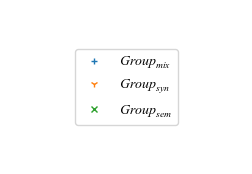

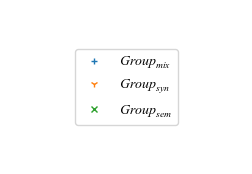

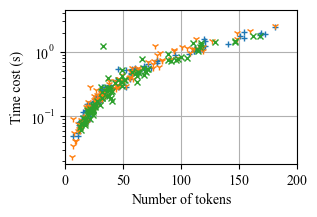

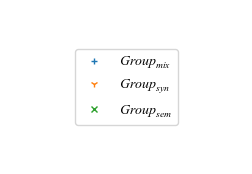

In [22]:
for num_mod in [1,3,5]:
    plt.figure(figsize=(3, 2))
    plt.xlim([0, 200])
    plt.yscale("log")

    stylemap = {"a": "+", "p": "1", "i": "x"}
    kindmap = {"a": "$Group_{mixture}$", "p": "$Group_{syntactic}$", "i": "$Group_{semantic}$"}
    clr = {"a": "#0b2a3f", "p": "#0c6c0c", "i":"#c186f7"}

    lines = []
    for nummod in [num_mod]:
        for kind in ["a", "p", "i"]:
            d_inp_time = data[(data["dist"]==nummod) & (data["cls_mod"]==kind)][["num_tokens", "total_time"]]
            l, = plt.plot(d_inp_time["num_tokens"], d_inp_time["total_time"], linestyle="", marker=stylemap[kind], label=f"{kindmap[kind]}", markersize=5)
            lines.append(l)
    plt.xlabel("Number of tokens")
    plt.ylabel("Time cost (s)")
    plt.grid()
    plt.savefig(f"kind-{num_mod}.pdf", bbox_inches=matplotlib.transforms.Bbox([[-0.3, -0.3], [3, 2]]))
    plt.show()
    plt.figure(figsize=(3, 2))
    plt.axis('off')
    plt.legend(lines, ["$Group_{mix}$", "$Group_{syn}$", "$Group_{sem}$"], bbox_to_anchor=[0.5, 0.5], loc='center')
    plt.savefig(f"kind-legend.pdf", bbox_inches=matplotlib.transforms.Bbox([[-0.3, -0.3], [3, 2]]))
    plt.show()